In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")
#hallo
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data = []
for file in os.listdir('Data_old'):
        with open('Data_old/'+file, mode='r') as tf:
            datain = np.genfromtxt(tf,delimiter="\t",skip_header=15).T
            data.append([file.split('.')[0],datain[0],datain[1],np.sqrt(datain[1].clip(min=1))])
            

In [3]:
anh = Path("Results/anhang.txt")
anh.touch()
nf = open(anh,"w")

dir = Path("Results/amplitudes.txt")
dir.touch()
countrate = open(dir,"w")
countrate.write("pressure\tg1_amplitude\tg1_amplitudeerr\tg2_amplitude\tg2_amplitudeerr\tg3_amplitude\tg3_amplitudeerr\tg4_amplitude\tg4_amplitudeerr\n")

dir2 = Path("Results/center.txt")
dir2.touch()
center = open(dir2,"w")
center.write("pressure\tg1_center\tg1_centererr\tg2_center\tg2_centererr\tg3_center\tg3_centererr\tg4_center\tg4_centererr\n")

101

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 162
    # data points      = 1500
    # variables        = 9
    chi-square         = 1671.68211
    reduced chi-square = 1.12118183
    Akaike info crit   = 180.547896
    Bayesian info crit = 228.366880
[[Variables]]
    g1_amplitude:  20322.8939 +/- 416.033539 (2.05%) (init = 1)
    g1_center:     997.140442 +/- 4.78817700 (0.48%) (init = 1000)
    g1_sigma:      176.705199 +/- 3.01741418 (1.71%) (init = 0.3)
    g2_amplitude:  21643.4140 +/- 510.677532 (2.36%) (init = 1)
    g2_center:     1345.42654 +/- 1.69371283 (0.13%) (init = 1400)
    g2_sigma:      102.096283 +/- 2.03147815 (1.99%) (init = 0.3)
    g3_amplitude:  13081.8444 +/- 210.364781 (1.61%) (init = 1)
    g3_center:     1649.49813 +/- 1.87541273 (0.11%) (init = 1700)
    g3_sigma:      89.5643196 +/- 1.23495069 (1.38%) (init = 0.3)
 

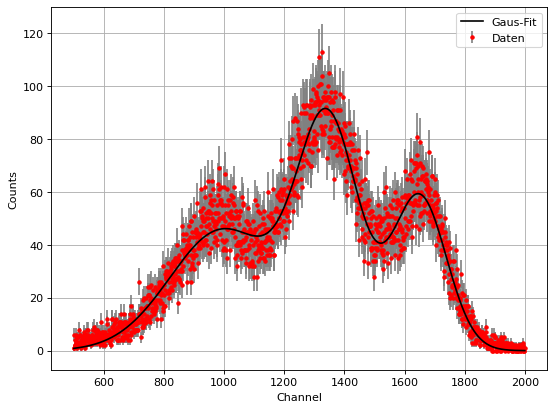

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 1200
    # variables        = 3
    chi-square         = 1490.59194
    reduced chi-square = 1.24527313
    Akaike info crit   = 266.222107
    Bayesian info crit = 281.492338
[[Variables]]
    amplitude:  12607.4922 +/- 125.710432 (1.00%) (init = 25042.5)
    center:     668.640042 +/- 1.65277983 (0.25%) (init = 685.6082)
    sigma:      161.232343 +/- 1.27966157 (0.79%) (init = 185.5)
    fwhm:       379.673146 +/- 3.01337266 (0.79%) == '2.3548200*sigma'
    height:     31.1951178 +/- 0.39201685 (1.26%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.131


<Figure size 432x288 with 0 Axes>

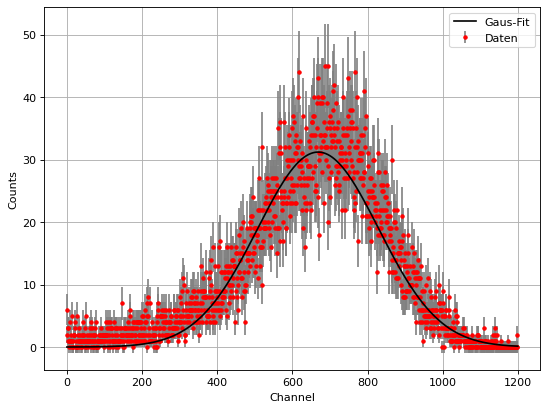

<Figure size 432x288 with 0 Axes>

In [4]:
for i in data:

    if i[0] == '125Torr':
        res = f.gaus3fit(i,500,2000,1000,800,1200,1400,1200,1500,1700,1500,1800)
        torr125_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/123Torr.pdf")
        nf.write(f.gausfit_table(torr125_3))

        amp1,amp2,amp3,amp4 = torr125_3.out.params["g1_amplitude"].value,torr125_3.out.params["g2_amplitude"].value,torr125_3.out.params["g3_amplitude"].value,'none'
        amperr1,amperr2,amperr3,amperr4 = torr125_3.out.params["g1_amplitude"].stderr,torr125_3.out.params["g2_amplitude"].stderr,torr125_3.out.params["g3_amplitude"].stderr,'none'
        countrate.write(str(i[0].split("Torr")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

        center1,center2,center3,center4 = torr125_3.out.params["g1_center"].value,torr125_3.out.params["g2_center"].value,torr125_3.out.params["g3_center"].value,'none'
        centererr1,centererr2,centererr3,centererr4 = torr125_3.out.params["g1_center"].stderr,torr125_3.out.params["g2_center"].stderr,torr125_3.out.params["g3_center"].stderr,'none'
        center.write(str(i[0].split("Torr")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")


    if i[0] == '500Torr':
        res = f.gaus1fit(i,0,1200)
        torr500_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/500Torr.pdf")
        nf.write(f.gausfit_table(torr500_1))




nf.close()
countrate.close()
center.close()